# Tarea 2 - Regresion Polinomial & Feature engineering

## Parte 1 - Modelo exponencial de covid-19 usando feature-eng

Usando el ejemplo de covid-19 en el notebook de feature-eng (https://colab.research.google.com/drive/1sJV2HG7tQgCGKES3-dIclzHQJ9qAWB3b?usp=sharing) crear un modelo de covid-19 para Guatemala.

* Convertir la fecha a un entero "número de día", por ejemplo si se usan datos desde el 22 de abril, este es el día 0, el 23 es el día 1.
* Aplicar regresión lineal sobre la variable "Confirmed" transformada.
* Una vez entrenado el modelo usarlo para aproximar la cantidad de casos confirmados para el 6 de Junio. Se debe reportar la cantidad de casos, no la cantidad transformada obtenida.

### Carga de Datos

Antes, de cualquier cosa colocamos las librerias que vamos a utilizar en el Notebook.

In [2]:
import datetime
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Cargamos el Dataset con la información del COVID19

In [3]:
covid19_data = pd.read_csv('covid_19_clean_complete.csv')
covid19_data["Date"] = pd.to_datetime(covid19_data["Date"],infer_datetime_format = True)
covid19_data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0
1,NaN,Albania,41.1533,20.1683,2020-01-22,0,0,0
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0,0,0
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0,0,0
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0,0,0


### Filtrado de Información 

Dado el Enunciado del Problema, solamente nos centraremos en crear un modelo para Guatemala; por lo que filtraremos en el dataset solamente los datos para Guatemala, a partir de la primera fecha que tiene un caso confirmado.

In [4]:
GT_confirmed = covid19_data[(covid19_data["Country/Region"] == 'Guatemala') & (covid19_data["Confirmed"] > 0)].copy()
print("Shape del Dataset= {} -> Solamente para Guatemala".format(GT_confirmed.shape))

Shape del Dataset= (67, 8) -> Solamente para Guatemala


### Revisión de Datos contenidos en Dataset

Revisamos que información nos envian en el dataset. Primero, revisamos las columnas enviadas y el tipo de dato.

In [5]:
GT_confirmed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67 entries, 13903 to 31393
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  0 non-null      object        
 1   Country/Region  67 non-null     object        
 2   Lat             67 non-null     float64       
 3   Long            67 non-null     float64       
 4   Date            67 non-null     datetime64[ns]
 5   Confirmed       67 non-null     int64         
 6   Deaths          67 non-null     int64         
 7   Recovered       67 non-null     int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 4.7+ KB


Vemos la información estadistica de las variables (para las variables númericas)

In [6]:
GT_confirmed.describe()

,Lat,Long,Confirmed,Deaths,Recovered
count,67.0000,6.700000e+01,67.000000,67.000000,67.000000
mean,15.7835,-9.023080e+01,449.388060,10.626866,42.970149
std,0.0000,2.863622e-14,547.142908,11.105330,45.624611
min,15.7835,-9.023080e+01,1.000000,0.000000,0.000000
25%,15.7835,-9.023080e+01,37.000000,1.000000,11.000000
50%,15.7835,-9.023080e+01,196.000000,5.000000,19.000000
75%,15.7835,-9.023080e+01,695.500000,17.000000,72.000000
max,15.7835,-9.023080e+01,2133.000000,43.000000,155.000000


Por lo que veo, realmente para la creación del Modelo practicamente se tendrian que quitar las variables de Estado, Latitud, Longitud; dado que estas estan atadas al Pais y realmente no van a agregar algún valor al modelo.

Las Variables que en algún momento se podrían determinar con el modelo son Cantidad de Confirmados(Confirmed), muertes(Deaths) o recuperados(Recovered).

Quitamos las columnas que no nos servirán para nada.

In [7]:
GT_confirmed=GT_confirmed.drop('Province/State', axis=1)
GT_confirmed=GT_confirmed.drop('Lat', axis=1)
GT_confirmed=GT_confirmed.drop('Long', axis=1)


Así quedaría el Dataset

In [8]:
GT_confirmed.head()

,Country/Region,Date,Confirmed,Deaths,Recovered
13903,Guatemala,2020-03-14,1,0,0
14168,Guatemala,2020-03-15,1,0,0
14433,Guatemala,2020-03-16,2,1,0
14698,Guatemala,2020-03-17,6,1,0
14963,Guatemala,2020-03-18,6,1,0


Vemos la Gráfica de dispersión de los datos que tenemos; especificamente para el Dato de Confirmados (Confirmed) que es la que de acuerdo al problema nos interesa determinar con el modelo.

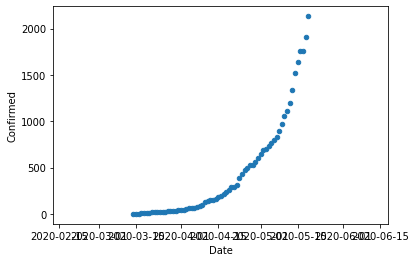

In [9]:
GT_confirmed.plot.scatter(x = "Date",y="Confirmed")

Vemos el Rango de Fechas del cual contamos la información:

In [10]:
print("Fecha Primer Caso   = {} -> Solamente para Guatemala".format(min(GT_confirmed["Date"])))   
print("Fecha Máxima Dataset= {} -> Solamente para Guatemala".format(max(GT_confirmed["Date"])))    

Fecha Primer Caso   = 2020-03-14 00:00:00 -> Solamente para Guatemala
Fecha Máxima Dataset= 2020-05-19 00:00:00 -> Solamente para Guatemala


### Transformación de Datos

En la gráfica anterior, vemos que los datos se comportan de forma exponencial; por lo que para el procesamiento del modelo transformaremos esos datos usando logaritmo natural.

In [11]:
##Dejamos la columna sin Modificar y agregamos una nueva columna
GT_confirmed["ln(confirmed)"] = np.log(GT_confirmed["Confirmed"])

Vemos como quedo la primera columna transformada; tanto a nivel de tabla como en forma gráfica.

In [12]:
GT_confirmed.head()

,Country/Region,Date,Confirmed,Deaths,Recovered,ln(confirmed)
13903,Guatemala,2020-03-14,1,0,0,0.000000
14168,Guatemala,2020-03-15,1,0,0,0.000000
14433,Guatemala,2020-03-16,2,1,0,0.693147
14698,Guatemala,2020-03-17,6,1,0,1.791759
14963,Guatemala,2020-03-18,6,1,0,1.791759


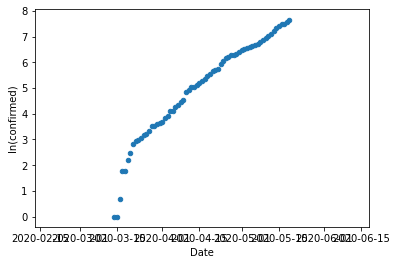

In [13]:
GT_confirmed.plot.scatter(x = "Date",y="ln(confirmed)")

Vemos que los datos de los primeros días, no tienen el mismo comportamiento que el resto de los datos; por lo que para no sesgar el modelo se quitaran.

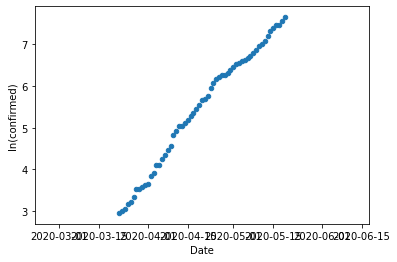

In [14]:
#Quitamos los datos y lo almacenamos en el dataset que ya teniamos
GT_confirmed = GT_confirmed[GT_confirmed.Date >= '2020-03-22']
#Vemos la gráfica nuevamente.
GT_confirmed.plot.scatter(x = "Date",y="ln(confirmed)")

Trabajar con las fechas complicaría los cálculos en el módelo, por lo que modificaremos el dato de fecha con la siguiente función.

In [15]:
#Modicará la fecha a un número consecutivo dependiendo la fecha. Siendo el número 0 la fecha 22-03-2020,
#número 1 la fecha 23-03-2020 y así en adelante
def mod_fecha_COVID(dates):
    #Nuestra fecha base será el primer dia de los datos de nuestro dataset ->22-03-2020 
    #Por facilidad se deja fijo.
    dt_base = datetime.datetime(2020, 3,22)
    
    #Se convierte en un objeto de Numpy Datetime64 que es el mismo dato que tenemos en el Dataset y para poder
    #manejar las operaciones vectorizadas
    dt_base64 = np.datetime64(dt_base)
    
    #Se busca hacer la función generica, por lo que condicionaremos si estamos usando un dataframe de pandas o otro objeto
    #ya que la forma de hacer las operaciones puede variar
    
    #Sino es un objeto de pandas devolvemos la información de esta forma
    if str(type(dates)).find('pandas') == -1:
        return (dates - dt_base64).astype('timedelta64[D]')/ np.timedelta64(1, 'D')
    #Si se trata de un objeto de pandas
    else:
        return (dates - dt_base64).dt.days

In [16]:
##Dejamos la columna sin Modificar y agregamos una nueva columna
GT_confirmed["Date(Numeric)"] = mod_fecha_COVID(GT_confirmed["Date"])

C:\Users\jonathan.deleon\.conda\envs\tf\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


***Nota***_:Hacer caso omiso de la advertencia._

Vemos como quedo la nueva columna de "Date(Numeric)"

In [17]:
GT_confirmed.head(5)

,Country/Region,Date,Confirmed,Deaths,Recovered,ln(confirmed),Date(Numeric)
16023,Guatemala,2020-03-22,19,1,0,2.944439,0
16288,Guatemala,2020-03-23,20,1,0,2.995732,1
16553,Guatemala,2020-03-24,21,1,0,3.044522,2
16818,Guatemala,2020-03-25,24,1,4,3.178054,3
17083,Guatemala,2020-03-26,25,1,4,3.218876,4


### Construcción del Modelo

#### Usando Scikit Learn

Primero usaremos la herramienta de Scikit Learn para realizar el modelo de regresión lineal.

In [18]:
from sklearn.linear_model import LinearRegression

#Instanciamos la clase para crear el Modelo de Regresión Lineal
reg = LinearRegression()

#Para mayor legibilidad lo almacenaremos el variables separadas al data frame
X = np.array(GT_confirmed["Date(Numeric)"]).reshape(-1,1)
Y = np.array(GT_confirmed["ln(confirmed)"]).reshape(-1,1)
reg.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Vemos como quedo la gráfica de nuestro modelo creado

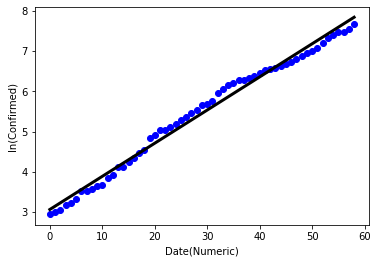

In [19]:
prediction_space = np.linspace(min(X),max(X)).reshape(-1,1)
plt.scatter(X, Y , color='blue')
plt.plot(prediction_space, reg.predict(prediction_space),color='black', linewidth=3)
plt.ylabel('ln(Confirmed)')
plt.xlabel('Date(Numeric)')
plt.show()

El Modelo de regresión Lineal nos quedaría de la siguiente forma:

In [20]:
print('y = ',round(float(reg.coef_[0]),4),'x + ',round(float(reg.intercept_),10))

y =  0.0824 x +  3.0655370802


Ahora recordemos que los datos de Y fueron transformados por el Logaritmo natural, por lo que debemos transformar nuestra formula para considerar eso:

$$y = e^(0.0824x+ 3.0655370802)$$

                                                                 o 

$$y = 21.445977104e^(0.0824x)$$


Con el modelo obtenido, graficamos en los datos originales.

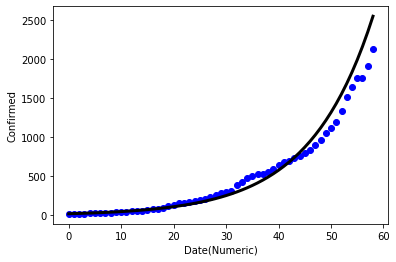

In [21]:
#Generamos un Vector con los 59 días que usamos de datos
x = np.arange(0,59)
#Calculamos el vector resultante con la función
y = np.exp(0.0824*x + 3.0655370802)
#Forma Alternativa
#y = 21.445977104 * np.exp(0.0824*x)

#Desplegamos la grafica
plt.scatter(GT_confirmed["Date(Numeric)"], GT_confirmed["Confirmed"] , color='blue')
plt.plot(x, y,color='black', linewidth=3)
plt.ylabel('Confirmed')
plt.xlabel('Date(Numeric)')
plt.show()

##### Calificación del Modelo

Por defecto scikit learn maneja la función R^2 para calificar el modelo.

In [22]:
# Compute and print R^2 
print("R^2: {}".format(reg.score(X, Y)))

R^2: 0.9874196265288994


Como vemos un R^2 de 0.99 para el Modelo es un buen indicador, se podría decir que es casi exacto. Pero para poder compararlo con el modelo que haremos en TensorFlow sacaremos el Error de acuerdo a:

$$error = 1/2*average((y-y_{hat})^2)$$

In [23]:
y_hat= 0.0824*x + 3.0655370802
error= 1/2* np.mean((np.array(y_hat).reshape(-1,1) - np.array(Y).reshape(-1,1))**2)
print("Error: {}".format(error))

Error: 0.012543369786288642


#### Usando TensorFlow

Copiamos las funciones para la creación del Modelo y la función de entrenamiento de la Practica anterior; ajustando la programación para varias features (Aunque no sirva para este modelo, servirá posteriormente).

In [24]:
import tensorflow as tf
if tf.__version__.startswith("2."):
  import tensorflow.compat.v1 as tf
  tf.compat.v1.disable_v2_behavior()
  tf.compat.v1.disable_eager_execution()
  print("Enabled compatitility to tf1.x")

Instructions for updating:
non-resource variables are not supported in the long term
Enabled compatitility to tf1.x


In [25]:
'''Clase que Definirá el Modelo a Entrenar'''
class Modelo:
    
    '''Metodo que define lo que se ejecuta al Instanciar la Clase'''
    def __init__(self,features):
        
        #Limpiamos cualquier variable o operación en el grafo 
        tf.reset_default_graph()
        
        #Parametros que entrenará el Modelo - Pendiente e Intercepto
        self.parametros = tf.get_variable("parametros",dtype=tf.float32,shape=(features,1),initializer=tf.zeros_initializer())
        
        ##Definimos los Tensores para la Inicialización de Variables
        with tf.name_scope("Inicializacion"):
            init_global = tf.global_variables_initializer()
            init_local = tf.local_variables_initializer()
            self.init = tf.group(init_global,init_local)
    
    '''Metodo que define el Modelo de Predicción'''    
    def __call__(self,x):
        ##Definimos el Modelo de Predicción
        with tf.name_scope("Modelo"):            
            #lo almacenamos en la propiedad de la clase self.y_hat para que pueda reutilizarse en los otros metodos
            #y no llamarlos varias veces - creando multiples instancias del modelo en tensorboard
            self.y_hat = tf.matmul(x,self.parametros,name="Prediccion_Modelo")
        return self.y_hat
    
    '''Metodo que define la Función de Error del Modelo''' 
    def error_function(self,y,y_hat):
        ##Definimos la función de Error
        with tf.name_scope("Error"):
            #lo almacenamos en la propiedad de la clase self.error para que pueda reutilizarse en los otros metodos
            #y no llamarlos varias veces - creando multiples instancias del modelo en tensorboard
            self.error = 1/2*tf.reduce_mean(tf.math.square(y - y_hat) )
        return self.error
    
    '''Metodo que define como se actualizan las variables que se entrenan en el Modelo''' 
    def actualizar(self,x,y,learning_rate):
        #Quitamos esto - Para no crear multiples tensores con el modelo de predicción
        #y_hat = self(x) 
    
        #Quitamos esto - Para no crear multiples tensores con el modelo de Error
        #error = self.error_function(y,self.y_hat)
        
        #Calculo de la Gradiente - Para variables de Pendiente e Intercepto
        with tf.name_scope("Calculo_Gradiente"):
            gradiente = tf.gradients(self.error,self.parametros)
        
        #Actualización de Variables del Modelo - Definición Tensores
        with tf.name_scope("Act_Parametros_Modelo"):
            actualizacion_parametros = tf.assign(self.parametros, self.parametros - learning_rate* gradiente[0] )
        return actualizacion_parametros
    
    '''Metodo que define el Scalar para Tensorboard'''
    def summary(self,x,y):
        #Quitamos esto - Para no crear multiples tensores con el modelo de predicción
        #self.y_hat = self(x)
        
        #Quitamos esto - Para no crear multiples tensores con el modelo de Error
        #error = self.error_function(y,self.y_hat)
        
        #Creamos el Tensor con la Información del Scalar
        MSE_summary = tf.summary.scalar(name='MSE_Function', tensor=self.error)
        return MSE_summary

In [26]:
import time

def Entrenamiento(learning_rate,epochs,imprimir_cada,x,y):
    
    #A la Matris X le agregamos una columna con 1 para el intercepto y que funcione el producto punto
    x_train = np.ones((x.shape[0],x.shape[1]+1))
    x_train[:,:-1]=x  
    
    #El Número de Features se determinará por las columnas enviadas en x + 1 (intercepto)
    features=x_train.shape[1]
    
    #Instanciamos la Clase que define el Modelo
    modelo = Modelo(features)
    
    #string de configuración para almacenamiento del Grafo
    string_conf= time.strftime("%Y%m%d") + "_"+time.strftime("%H%M%S")+"_Batch_GradientDescent_Lr="+str(learning_rate)+"_polinomio_grado="+('1' if features <=2 else '2')

    #Definimos los Placeholders que almacenarán los datos de Entrenamiento del Modelo
    tensor_x = tf.placeholder(tf.float32,[None,features],name="tensor_x")
    tensor_y = tf.placeholder(tf.float32,[None,1],name="tensor_y")

    #Llamamos a la función que define el modelo de Predicción
    prediccion = modelo(tensor_x)

    #Llamamos a la función que define la Función de Error (Costo)
    funcion_error = modelo.error_function(prediccion,tensor_y)

    #Llamamos a la función que define los tensores para actualizar las variables del Modelo
    actualizacion_parametros = modelo.actualizar(tensor_x,tensor_y,learning_rate)

    #llamamos a la función que define el Scalar a Reportar en Tensorboard
    MSE_summary = modelo.summary(tensor_x,tensor_y)

    #Iniciamos con una Sesión Monitoreada - Para el Entrenamiento del Modelo
    with tf.train.MonitoredSession() as session:

        # Inicialización de variables Globales y locales
        session.run(modelo.init)

        #Escritura del Grafo para Tensorboard
        writer = tf.summary.FileWriter('./graphs/'+string_conf, session.graph)

        #Creamos el Diccionario que le dará valor a los Placeholders
        feed_dict = {tensor_x:np.array(x_train).reshape(-1,features), tensor_y:np.array(y).reshape(-1,1)}

        #Entrenamiento del Modelo
        for step in range(epochs):

            #Ejecutamos el Grafo - Actualización de Datos
            session.run(actualizacion_parametros,feed_dict=feed_dict)
            #print(gr[0].shape)
            
            #Ejecutamos el Grafo - Predicción del Modelo
            predicciones = session.run(prediccion,feed_dict=feed_dict)
            
            #Ejecutamos el Grafo - Resultado de Variables Entrenadas
            #pendiente_final,intercepto_final = session.run(modelo.parametros,feed_dict=feed_dict)
            parametros_calculados = session.run(modelo.parametros,feed_dict=feed_dict)
            
            #print(parametros_calculados[len(parametros_calculados)-1])
            #print(parametros_calculados[0:len(parametros_calculados)-2])
            
            #Ejecutamos el Grafo - Datos Escalar
            summary = session.run(MSE_summary,feed_dict=feed_dict)

            #Almacenamos datos de Scalar - Para Tensorboard
            writer.add_summary(summary, step)

            #Imprimimos resultados de Variables por entrenamiento - Cada N Entrenamientos
            if (step+1) % imprimir_cada == 0:
                print("Prueba {} - Parámetros finales: m={}  b={}".format(step+1,
                                                                          parametros_calculados[0:len(parametros_calculados)-1],
                                                                          parametros_calculados[len(parametros_calculados)-1]))

        # Si queremos imprimir la función de Error - Despues del Entrenamiento 
        final_error = session.run(funcion_error,feed_dict=feed_dict)
        print("Error - Despues de Entrenamiento={}".format(final_error))

Haremos varias pruebas para encontrar el Learning Rate, la cantidad de Epochs necesarios para el modelo. 

(No colocaremos todas las pruebas aquí, solo la final con la que logramos los mejores resultados).

In [27]:
#Usaremos el mismo Learning rate del Proyecto
learning_rate = 0.001765

#Definimos cuantas iteraciones de Entrenamiento haremos
epochs=20000

#Definimos cada cuanto vamos a imprimir
imprimir_cada = 5000

#Para mayor legibilidad lo almacenaremos el variables separadas al data frame
X = np.array(GT_confirmed["Date(Numeric)"]).reshape(-1,1)
Y = np.array(GT_confirmed["ln(confirmed)"]).reshape(-1,1)

#Ejecutamos la función de Entrenamiento para los parametros definidos
Entrenamiento(learning_rate,epochs,imprimir_cada,X,Y)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Prueba 5000 - Parámetros finales: m=[[0.0905773]]  b=[2.7466679]
Prueba 10000 - Parámetros finales: m=[[0.08325186]]  b=[3.0323234]
Prueba 15000 - Parámetros finales: m=[[0.08248872]]  b=[3.0620792]
Prueba 20000 - Parámetros finales: m=[[0.08240923]]  b=[3.0651765]
Error - Despues de Entrenamiento=0.012543395161628723


El Modelo de regresión Lineal nos quedaría de la siguiente forma:

$$ y = 0.08240923x + 3.0651765 $$

Ahora recordemos que los datos de Y fueron transformados por el Logaritmo natural, por lo que debemos transformar nuestra formula para considerar eso:

$$y = e^(0.08240923x + 3.0651765)$$

                                                                 o 

$$y = 21.4382 e^(0.0824092 x)$$


Con el modelo obtenido, graficamos en los datos originales.

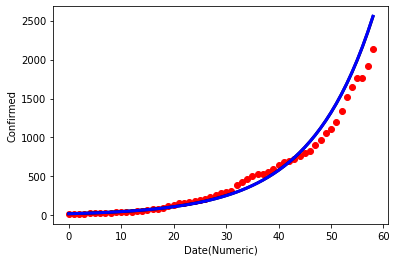

In [28]:
#Generamos un Vector con los 59 días que usamos de datos
x = np.arange(0,59)
#Calculamos el vector resultante con la función
y2 = np.exp(0.08248872*x + 3.0620792)
#Forma Alternativa
#y2 = 21.445977104 * np.exp(0.0824*x)

#Desplegamos la grafica
plt.scatter(GT_confirmed["Date(Numeric)"], GT_confirmed["Confirmed"] , color='red')
#Graficamos modelo realizado con ScikitLearn
plt.plot(x, y,color='black', linewidth=3)
#Graficamos modelo realizado con Tensorflow
plt.plot(x, y2,color='blue', linewidth=3)
plt.ylabel('Confirmed')
plt.xlabel('Date(Numeric)')
plt.show()

Aunque no es visible, se coloco en la misma gráfica los resultados evaluados con la función anterior, y por lo que podemos ver, visualmente no hay mayor diferencia.

##### Calificación del Modelo

Con Tensorflow con una gran cantidad de pruebas, acercamos el error del modelo a **0.012543395** que es muy parecida a la obtenida con Scikitlearn, pero un poco mayor. 

El problema fue la cantidad de pruebas que tuvimos que usar para llegar a ese resultado, fueron 20,000 pruebas y aún así el margen es un poco mejor el de scikit learn.

### Construcción de Función - A Partir del Modelo

Crearemos la función en Python que nos permita determinar el número de casos confirmados a una fecha (basandonos en los datos obtenidos por el modelo)

In [29]:
##Creación de Función que nos devolverá la proyección de casos proyectados a una fecha
##Para facilidad se recibiran los datos separados de dia, mes, año
def Casos_Confirmados_GT(dia, mes, año):
    date = datetime.datetime(año, mes,dia)
    
    #Se convierte en un objeto de Numpy Datetime64 que es el mismo dato que tenemos en el Dataset
    date_Converted = np.datetime64(date)
    
    #Convertimos la fecha a un consecutivo a partir de la fecha base
    id_date = mod_fecha_COVID(date_Converted)
    
    Confirmados= np.exp(0.0824*id_date + 3.0655370802)
    
    return Confirmados

### Predicción a Fecha

Tal como lo solicita el problema, se hará una predicción del número de casos confirmados al 06 de Junio 2020.

In [30]:
Confirmados= Casos_Confirmados_GT(6, 6, 2020)

print("El Número de Casos Confirmados al 6 de Junio sera {}".format(round(Confirmados,0)))

El Número de Casos Confirmados al 6 de Junio sera 11248.0


## Parte 2 - Modelo polinomial de calidad de vinos

Es permitido utilizar [sklearn.preprocessing.polynomialfeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)


### Instrucciones

1. Seleccionar y transformar(generando las combinaciones polinomiales para un polinomio de grado dos o tres a elección) las features que considere que son las mejores para predecir la calidad del vino, utilizar como minimo 2 features. Para seleccionar las features, hacer un analisis exploratorio por ejemplo(pero no limitado a ):  graficando y viendo la forma en que se comportan los datos.

 Por ejemplo, se tienen las features "a" y "b" y seleccionamos polinomio de grado 2, hacemos feature engineering para obtener :
 
 $[a,b,a^{2},b^{2},ab]$
 
 No olvidar el "bias" (parámetro multiplicado por 1) ,con lo cual el dataset puede quedar con las columnas:
 
 $[1,a,b,a^{2},b^{2},ab]$
2. Una vez transformada la data aplicar regresion lineal con las features polinomiales usando Tensorflow.

Requisitos adicionales:
* Se debe agregar al notebook un screenshot del grafo de tensorboard, simplificando(usando  names , y name_scope como visto en clase).

* Se debe generar un directorio de logs de tensorboard para cada corrida/experimento , con cada directorio identificando facilmente la configuración del experimento como visto en clase, por ejemplo para un experimento con learning rate = 0.1 , y polinomio grado 2  crear un directorio: lr=0.1_polinomio_grado=2. (Agregar al notebook un screenshot de estas gráficas)

* Concluir en markdown cual es el mejor modelo para este caso basado en la comparativa entre curvas de costo/error en tensorboard.

### Carga de Datos

Cargamos la información que nos servirá para crear el modelo.

In [31]:
import pandas as pd

In [32]:
dataWine = pd.read_csv('winequality-red.csv')

### Red Wine Quality Data

Se aplicará regresión para crear un modelo de la calidad de vino en función de características del mismo, siendo 1 el peor vino y 10 el mejor.

Variables de entrada:
1. fixed acidity 
2. volatile acidity 
3. citric acid 
4. residual sugar 
5. chlorides 
6. free sulfur dioxide 
7. total sulfur dioxide 
8. density 
9. pH 
10. sulphates 
11. alcohol 

Varaible a predecir: 
12. quality (puntuacion  entre 0 y 10) 



In [33]:
dataWine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Análisis de la Información

Revisamos la estructura del Dataframe con la información de vinos.

In [34]:
dataWine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Vemos la información estadistica de los datos con los que contamos.

In [35]:
dataWine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#### Correlación entre variables

Vemos la matriz de correlación entre las variables que tenemos en el dataset.

In [36]:
dataWine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


#### Graficas

Para cada variable en el dataframe se usará la libreria seaborn para graficar un histograma, integrado con la densidad de la misma.

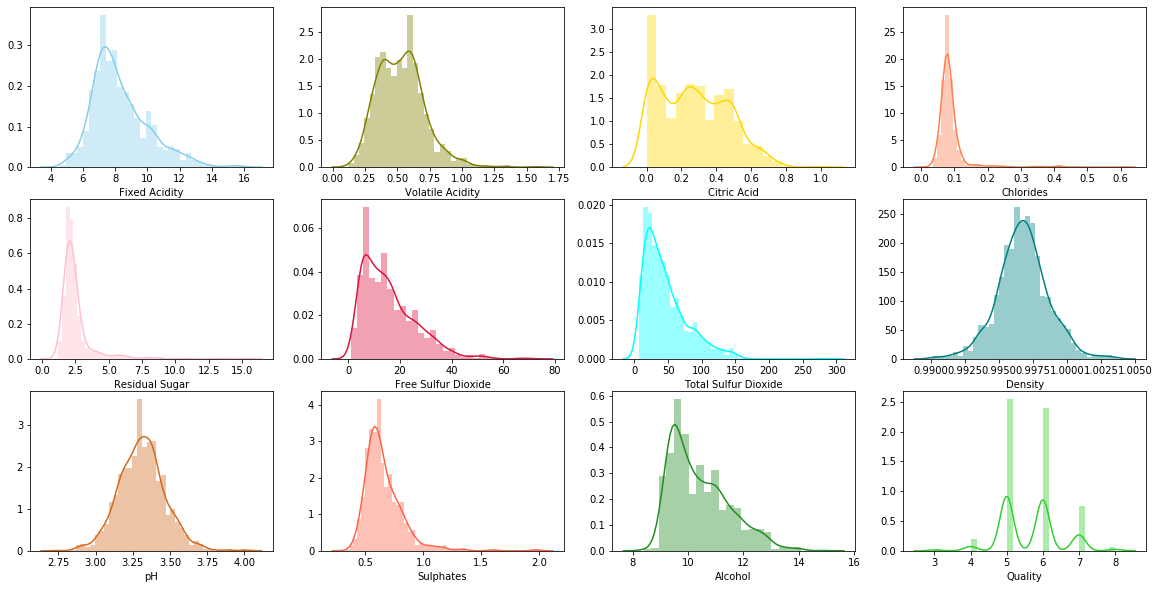

In [37]:
# Usamos esta libreria para armar la grafica de histograma y la grafica de densidad
import seaborn as sns
 
# plot
f, axes = plt.subplots(3, 4, figsize=(20, 10), sharex=False)
sns.distplot( dataWine["fixed acidity"] , color="skyblue", ax=axes[0, 0],axlabel="Fixed Acidity")
sns.distplot( dataWine["volatile acidity"] , color="olive", ax=axes[0, 1],axlabel="Volatile Acidity")
sns.distplot( dataWine["citric acid"] , color="gold", ax=axes[0, 2],axlabel="Citric Acid")
sns.distplot( dataWine["chlorides"] , color="coral", ax=axes[0, 3],axlabel="Chlorides")
sns.distplot( dataWine["residual sugar"] , color="pink", ax=axes[1, 0],axlabel="Residual Sugar")
sns.distplot( dataWine["free sulfur dioxide"] , color="crimson", ax=axes[1, 1],axlabel="Free Sulfur Dioxide")
sns.distplot( dataWine["total sulfur dioxide"] , color="cyan", ax=axes[1, 2],axlabel="Total Sulfur Dioxide")
sns.distplot( dataWine["density"] , color="teal", ax=axes[1, 3],axlabel="Density")
sns.distplot( dataWine["pH"] , color="chocolate", ax=axes[2, 0],axlabel="pH")
sns.distplot( dataWine["sulphates"] , color="tomato", ax=axes[2, 1],axlabel="Sulphates")
sns.distplot( dataWine["alcohol"] , color="forestgreen", ax=axes[2, 2],axlabel="Alcohol")
sns.distplot( dataWine["quality"] , color="limegreen", ax=axes[2, 3],axlabel="Quality")

plt.show()

Realizamos las graficas de dispersión de las posibles variables independientes contra la variable que estamos tratando determinar (Quality)

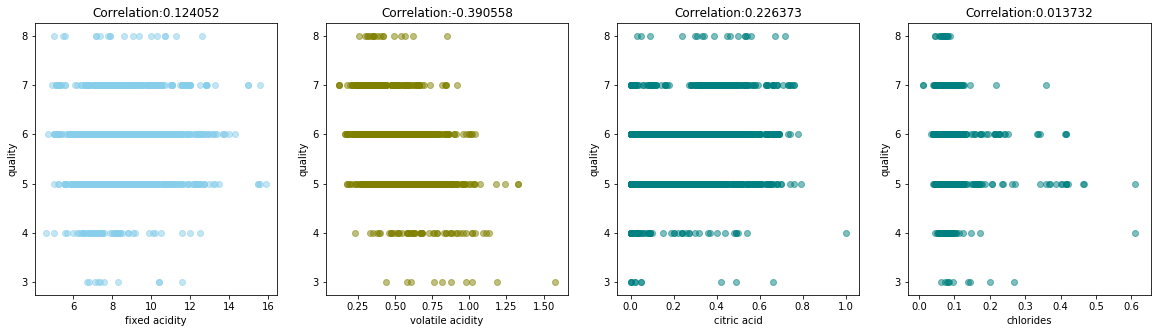

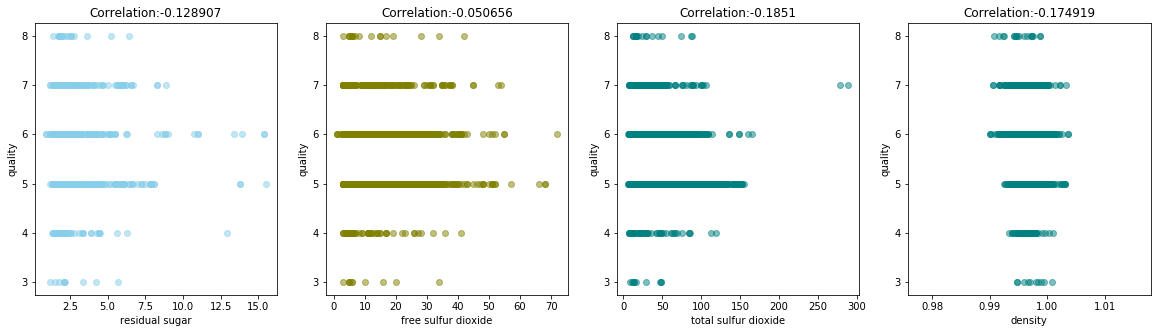

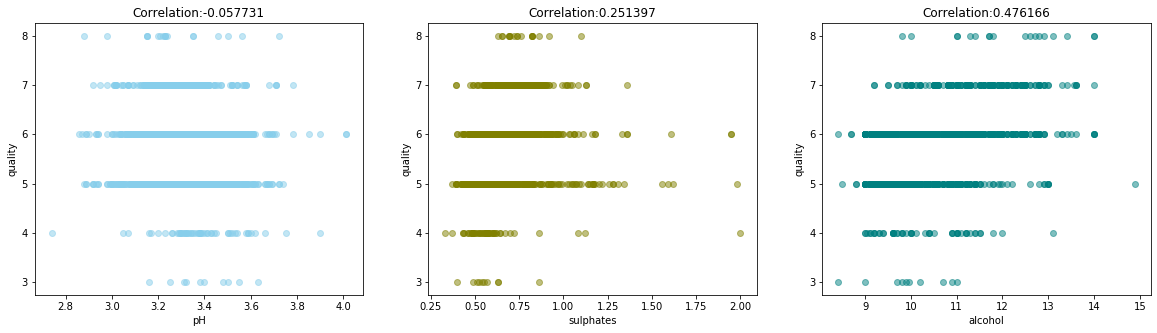

In [38]:
##Graficas de Dispersión de cada variable contra la variable buscada "Quality"
f, axes = plt.subplots(1,4, figsize=(20, 5), sharex=False)
##Efectuamos scatterplot de la Variable fixed acidity vrs quality
axes[0].scatter( dataWine["fixed acidity"],dataWine["quality"] , c="skyblue", alpha=0.5)
axes[0].set_title('Correlation:'+str(round(dataWine.corr()["quality"][0],6)))
axes[0].set_xlabel('fixed acidity')
axes[0].set_ylabel('quality')

##Efectuamos scatterplot de la Variable  volatile acidity vrs quality
axes[1].scatter( dataWine["volatile acidity"],dataWine["quality"]  , c="olive", alpha=0.5)
axes[1].set_title('Correlation:'+str(round(dataWine.corr()["quality"][1],6)))
axes[1].set_xlabel('volatile acidity')
axes[1].set_ylabel('quality')

##Efectuamos scatterplot de la Variable  citric acid vrs quality
axes[2].scatter( dataWine["citric acid"],dataWine["quality"] , c="teal", alpha=0.5)
axes[2].set_title('Correlation:'+str(round(dataWine.corr()["quality"][2],6)))
axes[2].set_xlabel('citric acid')
axes[2].set_ylabel('quality')

##Efectuamos scatterplot de la Variable  chlorides vrs quality
axes[3].scatter( dataWine["chlorides"],dataWine["quality"] , c="teal", alpha=0.5)
axes[3].set_title('Correlation:'+str(round(dataWine.corr()["quality"][3],6)))
axes[3].set_xlabel('chlorides')
axes[3].set_ylabel('quality')

f, axes2 = plt.subplots(1, 4, figsize=(20, 5), sharex=False)
##Efectuamos scatterplot de la Variable residual sugar vrs quality
axes2[0].scatter( dataWine["residual sugar"],dataWine["quality"] , c="skyblue", alpha=0.5)
axes2[0].set_title('Correlation:'+str(round(dataWine.corr()["quality"][4],6)))
axes2[0].set_xlabel('residual sugar')
axes2[0].set_ylabel('quality')

##Efectuamos scatterplot de la Variable  free sulfur dioxide vrs quality
axes2[1].scatter( dataWine["free sulfur dioxide"],dataWine["quality"]  , c="olive", alpha=0.5)
axes2[1].set_title('Correlation:'+str(round(dataWine.corr()["quality"][5],6)))
axes2[1].set_xlabel('free sulfur dioxide')
axes2[1].set_ylabel('quality')

##Efectuamos scatterplot de la Variable  total sulfur dioxide vrs quality
axes2[2].scatter( dataWine["total sulfur dioxide"],dataWine["quality"] , c="teal", alpha=0.5)
axes2[2].set_title('Correlation:'+str(round(dataWine.corr()["quality"][6],6)))
axes2[2].set_xlabel('total sulfur dioxide')
axes2[2].set_ylabel('quality')

##Efectuamos scatterplot de la Variable  density vrs quality
axes2[3].scatter( dataWine["density"],dataWine["quality"] , c="teal", alpha=0.5)
axes2[3].set_title('Correlation:'+str(round(dataWine.corr()["quality"][7],6)))
axes2[3].set_xlabel('density')
axes2[3].set_ylabel('quality')

f, axes3 = plt.subplots(1, 3, figsize=(20, 5), sharex=False)
##Efectuamos scatterplot de la Variable pH vrs quality
axes3[0].scatter( dataWine["pH"],dataWine["quality"]  , c="skyblue", alpha=0.5)
axes3[0].set_title('Correlation:'+str(round(dataWine.corr()["quality"][8],6)))
axes3[0].set_xlabel('pH')
axes3[0].set_ylabel('quality')

##Efectuamos scatterplot de la Variable  sulphates vrs quality
axes3[1].scatter( dataWine["sulphates"],dataWine["quality"]  , c="olive", alpha=0.5)
axes3[1].set_title('Correlation:'+str(round(dataWine.corr()["quality"][9],6)))
axes3[1].set_xlabel('sulphates')
axes3[1].set_ylabel('quality')

##Efectuamos scatterplot de la Variable  alcohol vrs quality
axes3[2].scatter( dataWine["alcohol"],dataWine["quality"] , c="teal", alpha=0.5)
axes3[2].set_title('Correlation:'+str(round(dataWine.corr()["quality"][10],6)))
axes3[2].set_xlabel('alcohol')
axes3[2].set_ylabel('quality')

plt.show()

#### Regularización - Lasso

Usaremos el metodo de regularización Lazzo para identificar de otra forma cuales variables aportan más al modelo.

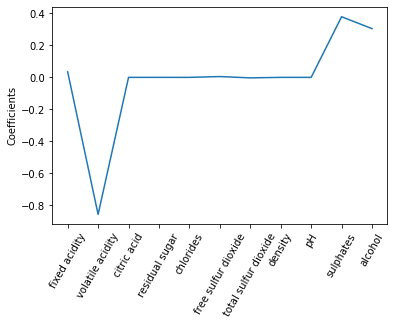

In [39]:
##Usamos la libreria de ScikitLearn
from sklearn.linear_model import Lasso

names = dataWine.drop('quality', axis= 1).columns
X = dataWine.drop('quality', axis=1).values
y = dataWine['quality'].values
lasso = Lasso(alpha = 0.01)
lasso_coef = lasso.fit(X,y).coef_
_ = plt.plot(range(len(names)),lasso_coef)
_ = plt.xticks(range(len(names)),names,rotation=60)
_ = plt.ylabel('Coefficients')
plt.show()

Según el Metodo de Regularización Lasso, podemos determinar que las únicas variables que afectan el modelo son **"volatile acidity", "sulphates" y "alcohol"**.

### Elección de Variables

En base al análisis anterior se elegiran las variables(Features) siguiente: **"volatile acidity"** y **"alcohol"** para la creación de un modelo para la predicción de la varible dependiente "Quality".

La elección de estas variables se basa en:
* Las Variables con mayor correlación con la variable "Quality".
* De acuerdo al metodo de regularazión - lasso se determino que estas variables si influyen en el modelo.
* De acuerdo al histograma y la gráfica de densidad estas variables muestran una distribución adecudada.

Veamos la grafica de como se relacionan estas dos variables con respecto a la Calidad ("Quality")

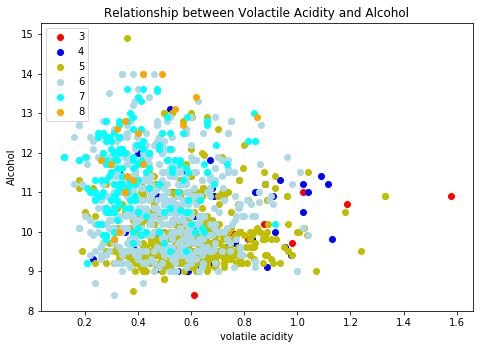

In [40]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
##Solo se graficarán del 3 al 8, dado que nuestro data set solo cuenta con este rango
ax.scatter(dataWine[dataWine['quality']==3]['volatile acidity'], dataWine[dataWine['quality']==3].alcohol, color='r', label=3)
ax.scatter(dataWine[dataWine['quality']==4]['volatile acidity'], dataWine[dataWine['quality']==4].alcohol, color='b', label=4)
ax.scatter(dataWine[dataWine['quality']==5]['volatile acidity'], dataWine[dataWine['quality']==5].alcohol, color='y', label=5)
ax.scatter(dataWine[dataWine['quality']==6]['volatile acidity'], dataWine[dataWine['quality']==6].alcohol, color='lightblue', label=6)
ax.scatter(dataWine[dataWine['quality']==7]['volatile acidity'], dataWine[dataWine['quality']==7].alcohol, color='cyan', label=7)
ax.scatter(dataWine[dataWine['quality']==8]['volatile acidity'], dataWine[dataWine['quality']==8].alcohol, color='orange', label=8)
ax.set_xlabel('volatile acidity')
ax.set_ylabel('Alcohol')
ax.set_title('Relationship between Volactile Acidity and Alcohol')
plt.legend(loc="upper left")
plt.show()

### Transformación de Datos

Se creará un Dataset con la información que realmente usaremos para predecir el modelo. Se sacará del dataframe la información de las variables seleccionadas.

In [41]:
#Se crea el arreglo con los Features
X_train = np.array(dataWine[["volatile acidity","alcohol"]]).reshape(-1,2)

#Se crea el arreglo con la información de la Variable Dependiente
Y_train = np.array(dataWine["quality"]).reshape(-1,1)

 Transformamos nuestra matrix para tener los datos de esta forma.
 
 $[a,b,a^{2},b^{2},ab]$
 
 No se agregará la columna del intercepto, dado que la función desarrollada para el modelo la agregará automáticamente.

In [42]:
#Libreria que nos ayudará a la transformación de los datos
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)
X_train= poly.fit_transform(X_train)

#Borramos la primera columna del Intercepto, ya que la función del modelo la agregará donde corresponda
X_train = np.delete(X_train, 0, axis=1)

Nuestra Matriz con los features quedará de la siguiente forma:

In [43]:
print("Forma de Matriz de Features: {}".format(X_train.shape))
print("Matriz de Features:{}".format(X_train))

Forma de Matriz de Features: (1599, 5)
Matriz de Features:[[7.00000e-01 9.40000e+00 4.90000e-01 6.58000e+00 8.83600e+01]
 [8.80000e-01 9.80000e+00 7.74400e-01 8.62400e+00 9.60400e+01]
 [7.60000e-01 9.80000e+00 5.77600e-01 7.44800e+00 9.60400e+01]
 ...
 [5.10000e-01 1.10000e+01 2.60100e-01 5.61000e+00 1.21000e+02]
 [6.45000e-01 1.02000e+01 4.16025e-01 6.57900e+00 1.04040e+02]
 [3.10000e-01 1.10000e+01 9.61000e-02 3.41000e+00 1.21000e+02]]


### Construcción del Modelo

#### Usando Scikit Learn
Primero usaremos la herramienta de Scikit Learn para realizar el modelo de regresión lineal de las dos variables.

In [44]:
#Instanciamos la clase para crear el Modelo de Regresión Lineal
reg_pol = LinearRegression()

#Dado que ya tenemos los datos transformados, solo los pasamos para el ajuste del modelo.
reg_pol.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Vemos como quedo la gráfica de nuestro modelo creado

In [45]:
y_hat = reg_pol.predict(X_train)
##Redondeamos a Cero decimales
y_hat = np.round(y_hat,decimals=0)

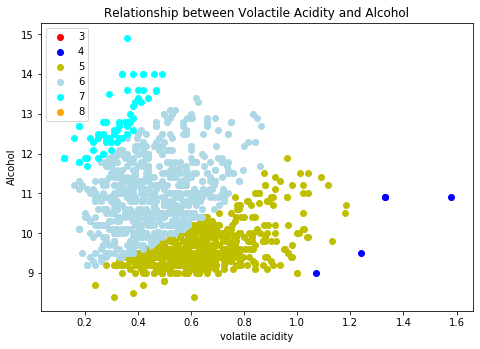

In [46]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
##Solo se graficarán del 3 al 8, dado que nuestro data set solo cuenta con este rango
ax.scatter(X_train[y_hat[:,0]==3,0], X_train[y_hat[:,0]==3,1], color='r', label=3)
ax.scatter(X_train[y_hat[:,0]==4,0], X_train[y_hat[:,0]==4,1], color='b', label=4)
ax.scatter(X_train[y_hat[:,0]==5,0], X_train[y_hat[:,0]==5,1], color='y', label=5)
ax.scatter(X_train[y_hat[:,0]==6,0], X_train[y_hat[:,0]==6,1], color='lightblue', label=6)
ax.scatter(X_train[y_hat[:,0]==7,0], X_train[y_hat[:,0]==7,1], color='cyan', label=7)
ax.scatter(X_train[y_hat[:,0]==8,0], X_train[y_hat[:,0]==8,1], color='orange', label=8)
ax.set_xlabel('volatile acidity')
ax.set_ylabel('Alcohol')
ax.set_title('Relationship between Volactile Acidity and Alcohol')
plt.legend(loc="upper left")
plt.show()

Varia bastante con el dato original, pero es la mejor predicción que se puede hacer.

El Modelo de regresión Lineal nos quedaría de la siguiente forma:

In [87]:
print("y = {}x1 + {}x2 + {}x1^2 + {}x1x2 + {}x2^2 + {}".format(round(float(reg_pol.coef_[0,0]),8),
                                                               round(float(reg_pol.coef_[0,1]),8),
                                                               round(float(reg_pol.coef_[0,2]),8),
                                                               round(float(reg_pol.coef_[0,3]),8),
                                                               round(float(reg_pol.coef_[0,4]),8),
                                                               round(float(reg_pol.intercept_),10)))

y = 0.51444933x1 + 0.94813708x2 + -0.35223721x1^2 + -0.14108683x1x2 + -0.02579466x2^2 + -0.8062014925


##### Calificación del Modelo

Por defecto scikit learn maneja la función R^2 para calificar el modelo.

In [48]:
# Compute and print R^2 
print("R^2: {}".format(reg_pol.score(X_train, Y_train)))

R^2: 0.3196185497520263


Podemos ver, que el modelo no tiene un score R^2 alto, es bastante bajo, es de 0.3196.

Ahora, para poder compararlo con el modelo que haremos en TensorFlow sacaremos el Error de acuerdo a:

$$error = 1/2*average((y-y_{hat})^2)$$

In [49]:
error= 1/2* np.mean((np.array(y_hat).reshape(-1,1) - np.array(Y_train).reshape(-1,1))**2)
print("Error: {}".format(error))

Error: 0.2614133833646029



#### Usando TensorFlow
Usamos la función y el modelo de entrenamiento usando en la parte 1 (en la sección anterior de este notebook).

La función para la creación del modelo en Tensorflow y la función de entrenamiento ya fue ajustada para manejar varios Features.

Probamos el Modelo solo para asegurar que no haya errores y que pueda manejar varios features. Por el momento pocas corridas.

In [50]:
#Usaremos el mismo Learning rate del Proyecto
learning_rate = 0.001

#Definimos cuantas iteraciones de Entrenamiento haremos
epochs=5

#Definimos cada cuanto vamos a imprimir
imprimir_cada = 5

#Ejecutamos la función de Entrenamiento para los parametros definidos
Entrenamiento(learning_rate,epochs,imprimir_cada,X_train,Y_train)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Prueba 5 - Parámetros finales: m=[[   49.66513]
 [ 1016.1432 ]
 [   28.96075]
 [  524.51636]
 [10943.008  ]]  b=[95.444466]
Error - Despues de Entrenamiento=770500526080.0


##### Tensorboard - Grafo
Vemos como quedo nuestro Grafo en Tensorboard, de acuerdo al modelo definido.

<img src="assets2/Grafo_Tensorboard.png">

##### Tensorboard - Scalar
El Error obtenido por la función MSE (Mean Squared Error) se puede visualizar en tensorbord de la siguiente manera:

<img src="assets2/Scalar_Tensorboard.png">


Vemos tambien como en Tensorboard se muestra la prueba con el string de configuración requerido.

<img src="assets2/Tensorboard_StringConf.png">

##### Pruebas de Entrenamiento para Ajuste Parametros Modelo
Haremos pruebas para ir ajustando los hyperparametros para el correcto funcionamiento de nuestro modelo.

###### Modelo 1

Probamos con un Learning rate de 0.001, y para prueba inicial, haremos una prueba con 100 EPOCHS.

In [54]:
#Seteamos el Learning rate
learning_rate = 0.001

#Definimos cuantas iteraciones de Entrenamiento haremos
epochs=100

#Definimos cada cuanto vamos a imprimir
imprimir_cada = 20

#Ejecutamos la función de Entrenamiento para los parametros definidos
Entrenamiento(learning_rate,epochs,imprimir_cada,X_train,Y_train)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Prueba 20 - Parámetros finales: m=[[-5.42749795e+17]
 [-1.11046320e+19]
 [-3.16489268e+17]
 [-5.73203449e+18]
 [-1.19588066e+20]]  b=[-1.0430333e+18]
Prueba 40 - Parámetros finales: m=[[nan]
 [nan]
 [nan]
 [nan]
 [nan]]  b=[nan]
Prueba 60 - Parámetros finales: m=[[nan]
 [nan]
 [nan]
 [nan]
 [nan]]  b=[nan]
Prueba 80 - Parámetros finales: m=[[nan]
 [nan]
 [nan]
 [nan]
 [nan]]  b=[nan]
Prueba 100 - Parámetros finales: m=[[nan]
 [nan]
 [nan]
 [nan]
 [nan]]  b=[nan]
Error - Despues de Entrenamiento=nan


No sirvio el modelo, el modelo no converge. Veamos la grafica en Tensorboard.

<img src="assets2/Scalar_Tensorboard_Modelo1.png">

###### Modelo 2

Probamos con un Learning rate mas bajo 0.0001, y para prueba inicial, haremos una prueba con 100 EPOCHS.

In [59]:
#Seteamos el Learning rate
learning_rate = 0.0001

#Definimos cuantas iteraciones de Entrenamiento haremos
epochs=100

#Definimos cada cuanto vamos a imprimir
imprimir_cada = 20

#Ejecutamos la función de Entrenamiento para los parametros definidos
Entrenamiento(learning_rate,epochs,imprimir_cada,X_train,Y_train)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Prueba 20 - Parámetros finales: m=[[0.00036274]
 [0.0063184 ]
 [0.00018034]
 [0.00298494]
 [0.04911689]]  b=[0.00075291]
Prueba 40 - Parámetros finales: m=[[0.00050051]
 [0.00805202]
 [0.00022917]
 [0.00359678]
 [0.04892302]]  b=[0.00107465]
Prueba 60 - Parámetros finales: m=[[0.00063713]
 [0.00977986]
 [0.00027701]
 [0.00419921]
 [0.04873016]]  b=[0.00139531]
Prueba 80 - Parámetros finales: m=[[0.00077259]
 [0.01150195]
 [0.00032386]
 [0.00479233]
 [0.0485383 ]]  b=[0.0017149]
Prueba 100 - Parámetros finales: m=[[0.00090692]
 [0.01321832]
 [0.00036974]
 [0.00537622]
 [0.04834742]]  b=[0.00203343]
Error - Despues de Entrenamiento=0.5534388422966003


Tuvimos un mejor valor en el modelo, si tuvo convergencia; el error fue de **0.5534388**. Veamos la grafica en Tensorboard.

<img src="assets2/Scalar_Tensorboard_Modelo2.png">

###### Modelo 3

Probamos con un Learning rate un poco mas alto 0.0002, y para prueba inicial, haremos una prueba con 100 EPOCHS.

In [60]:
#Seteamos el Learning rate
learning_rate = 0.0002

#Definimos cuantas iteraciones de Entrenamiento haremos
epochs=100

#Definimos cada cuanto vamos a imprimir
imprimir_cada = 20

#Ejecutamos la función de Entrenamiento para los parametros definidos
Entrenamiento(learning_rate,epochs,imprimir_cada,X_train,Y_train)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Prueba 20 - Parámetros finales: m=[[  -1.3553015 ]
 [ -27.731571  ]
 [  -0.79036856]
 [ -14.315162  ]
 [-298.685     ]]  b=[-2.6044483]
Prueba 40 - Parámetros finales: m=[[   -8213.514 ]
 [ -168048.03  ]
 [   -4789.4834]
 [  -86743.74  ]
 [-1809744.9   ]]  b=[-15784.391]
Prueba 60 - Parámetros finales: m=[[-4.9757916e+07]
 [-1.0180447e+09]
 [-2.9014936e+07]
 [-5.2549814e+08]
 [-1.0963532e+10]]  b=[-95622620.]
Prueba 80 - Parámetros finales: m=[[-3.0143555e+11]
 [-6.1673570e+12]
 [-1.7577358e+11]
 [-3.1834930e+12]
 [-6.6417576e+13]]  b=[-5.79286e+11]
Prueba 100 - Parámetros finales: m=[[-1.82611406e+15]
 [-3.73622169e+16]
 [-1.06484735e+15]
 [-1.92857775e+16]
 [-4.02361161e+17]]  b=[-3.509348e+15]
Error - Despues de Entrenamiento=inf


Empeoramos el modelo, nuevamente no se tuvo convergencia, al igual que el modelo 1. Veamos la grafica en Tensorboard.

<img src="assets2/Scalar_Tensorboard_Modelo3.png">

###### Modelo 4

Probamos con un Learning rate un poco parecido al modelo 2, un poco más alto 0.00015, y para prueba inicial, haremos una prueba con 100 EPOCHS.

In [61]:
#Seteamos el Learning rate
learning_rate = 0.00015

#Definimos cuantas iteraciones de Entrenamiento haremos
epochs=100

#Definimos cada cuanto vamos a imprimir
imprimir_cada = 20

#Ejecutamos la función de Entrenamiento para los parametros definidos
Entrenamiento(learning_rate,epochs,imprimir_cada,X_train,Y_train)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Prueba 20 - Parámetros finales: m=[[0.00039841]
 [0.00650299]
 [0.00018543]
 [0.00293964]
 [0.04166386]]  b=[0.00084978]
Prueba 40 - Parámetros finales: m=[[0.00063219]
 [0.00967817]
 [0.00027414]
 [0.00414697]
 [0.04763281]]  b=[0.00138578]
Prueba 60 - Parámetros finales: m=[[0.00083922]
 [0.01234596]
 [0.00034654]
 [0.00507809]
 [0.048279  ]]  b=[0.00187293]
Prueba 80 - Parámetros finales: m=[[0.0010401 ]
 [0.01492717]
 [0.00041467]
 [0.0059505 ]
 [0.04813304]]  b=[0.00235076]
Prueba 100 - Parámetros finales: m=[[0.00123793]
 [0.01748468]
 [0.00048033]
 [0.0067969 ]
 [0.04787078]]  b=[0.0028252]
Error - Despues de Entrenamiento=0.5492008328437805


Se mejora el Error del Modelo 2, disminuyendo un poco, ahora obtenemos un error de **0.5492**. Vemos la información de Tensorboard.

<img src="assets2/Scalar_Tensorboard_Modelo4.png">

###### Modelo 5

Probamos con un Learning rate un poco mas alto al anterior 0.00016, y para prueba inicial, haremos una prueba con 100 EPOCHS.

In [62]:
#Seteamos el Learning rate
learning_rate = 0.00016

#Definimos cuantas iteraciones de Entrenamiento haremos
epochs=100

#Definimos cada cuanto vamos a imprimir
imprimir_cada = 20

#Ejecutamos la función de Entrenamiento para los parametros definidos
Entrenamiento(learning_rate,epochs,imprimir_cada,X_train,Y_train)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Prueba 20 - Parámetros finales: m=[[-1.3149343e-05]
 [-2.0259749e-03]
 [-5.7709316e-05]
 [-1.4911713e-03]
 [-5.2072778e-02]]  b=[6.456196e-05]
Prueba 40 - Parámetros finales: m=[[-0.00027587]
 [-0.00911203]
 [-0.00026177]
 [-0.00561081]
 [-0.15847622]]  b=[-0.00034753]
Prueba 60 - Parámetros finales: m=[[-0.00104694]
 [-0.02655376]
 [-0.00076306]
 [-0.01509217]
 [-0.3762426 ]]  b=[-0.00173367]
Prueba 80 - Parámetros finales: m=[[-0.00285686]
 [-0.06520585]
 [-0.00187092]
 [-0.03553781]
 [-0.8222669 ]]  b=[-0.00511338]
Prueba 100 - Parámetros finales: m=[[-0.00679301]
 [-0.14731659]
 [-0.00421938]
 [-0.07843161]
 [-1.7361472 ]]  b=[-0.01257639]
Error - Despues de Entrenamiento=20477.146484375


Este modelo no resulto mejor que el modelo 4, empeoro, vemos un error de **20477.15**. Vemos la información de Tensorboard.

<img src="assets2/Scalar_Tensorboard_Modelo5.png">

###### Modelo 6

Vemos que el Learning rate que mejor funciono fue el 0.00015; ahora, dejamos este Learning rate, pero incrementamos el número de EPOCHS a 10000 para ver si mejoramos el modelo.

In [70]:
#Seteamos el Learning rate
learning_rate = 0.00015

#Definimos cuantas iteraciones de Entrenamiento haremos
epochs=10000

#Definimos cada cuanto vamos a imprimir
imprimir_cada = 2000

#Ejecutamos la función de Entrenamiento para los parametros definidos
Entrenamiento(learning_rate,epochs,imprimir_cada,X_train,Y_train)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Prueba 2000 - Parámetros finales: m=[[0.01239095]
 [0.21534799]
 [0.00060423]
 [0.02837204]
 [0.02809628]]  b=[0.03952056]
Prueba 4000 - Parámetros finales: m=[[ 0.01672024]
 [ 0.36103272]
 [-0.00396785]
 [ 0.00329717]
 [ 0.01552728]]  b=[0.0665139]
Prueba 6000 - Parámetros finales: m=[[ 0.01884984]
 [ 0.46808302]
 [-0.00863634]
 [-0.02618737]
 [ 0.0068299 ]]  b=[0.08633737]
Prueba 8000 - Parámetros finales: m=[[ 2.0190202e-02]
 [ 5.4837614e-01]
 [-1.2503963e-02]
 [-5.0970275e-02]
 [ 4.3648769e-04]]  b=[0.10119872]
Prueba 10000 - Parámetros finales: m=[[ 0.02113851]
 [ 0.60899633]
 [-0.01556013]
 [-0.07030674]
 [-0.00435971]]  b=[0.11241232]
Error - Despues de Entrenamiento=0.24086441099643707


Se mejora el Error del Modelo 4, disminuyendo bastante, obtuvimos un error de **0.2408**. Vemos la información de Tensorboard.

<img src="assets2/Scalar_Tensorboard_Modelo6.png">

###### Modelo 7

Incrementamos el Learning 0.000156; ahora dejamos el número de EPOCHS a 10000 para ver si mejoramos el modelo.

In [72]:
#Seteamos el Learning rate
learning_rate = 0.000156

#Definimos cuantas iteraciones de Entrenamiento haremos
epochs=10000

#Definimos cada cuanto vamos a imprimir
imprimir_cada = 5000

#Ejecutamos la función de Entrenamiento para los parametros definidos
Entrenamiento(learning_rate,epochs,imprimir_cada,X_train,Y_train)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Prueba 5000 - Parámetros finales: m=[[ 0.01813363]
 [ 0.4289824 ]
 [-0.00684964]
 [-0.01477344]
 [ 0.00997527]]  b=[0.07909783]
Prueba 10000 - Parámetros finales: m=[[ 0.0212955 ]
 [ 0.6192186 ]
 [-0.01608675]
 [-0.07359261]
 [-0.00516723]]  b=[0.11430229]
Error - Despues de Entrenamiento=0.2388671487569809


Se mejora el Error del Modelo 6, disminuyendo el error a **0.2388**. Vemos la información de Tensorboard.

<img src="assets2/Scalar_Tensorboard_Modelo7.png">

###### Modelo 8

Dejamos el Learning 0.000156; Duplicamos el número de EPOCHS a 20000 para ver si mejoramos el modelo.

In [74]:
#Seteamos el Learning rate
learning_rate = 0.000156

#Definimos cuantas iteraciones de Entrenamiento haremos
epochs=20000

#Definimos cada cuanto vamos a imprimir
imprimir_cada = 10000

#Ejecutamos la función de Entrenamiento para los parametros definidos
Entrenamiento(learning_rate,epochs,imprimir_cada,X_train,Y_train)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Prueba 10000 - Parámetros finales: m=[[ 0.0212955 ]
 [ 0.6192186 ]
 [-0.01608675]
 [-0.07359261]
 [-0.00516723]]  b=[0.11430229]
Prueba 20000 - Parámetros finales: m=[[ 0.02333377]
 [ 0.75578576]
 [-0.02381971]
 [-0.11763871]
 [-0.01594578]]  b=[0.13948976]
Error - Despues de Entrenamiento=0.22283552587032318


Se mejora el Error del Modelo 7, disminuyendo el error a **0.2228**. Vemos la información de Tensorboard.

<img src="assets2/Scalar_Tensorboard_Modelo8.png">

##### Calificación del Modelo
Con Tensorflow, con una gran cantidad de pruebas, acercamos el error del modelo a 0.222835, que es mejor a la obtenida con Scikitlearn. Aunque como no evaluamos con datos de Prueba, esto es relativo aún; ya que con Tensorflow pudimos haber caido en Overfitting.

Podemos concluir que con Tensorboard el Modelo que mas se ajusta es el **Modelo 8**. Los datos serian:

* Learning rate = 0.000156
* EPOCHS = 20000
* Pendientes (m) = [[ 0.02333377],[ 0.75578576],[-0.02381971],[-0.11763871],[-0.01594578]]
* Intercepto (b) = 0.13948976
* MSE al Finalizar la Prueba = 0.22283552587032318

La función quedaría de la siguiente forma:

$$y = 0.02333377x1 + 0.75578576x2 - 0.02381971x1^2 - 0.11763871x1x2 - 0.01594578x^2 + 0.13948976$$

Vemos como queda la grafica con este modelo.

In [88]:
x1=X_train[:,0]
x2=X_train[:,1]

#obtenemos la predicción
y_hat = 0.02333377*x1 + 0.75578576*x2 - 0.02381971*(x1**2) - 0.11763871*x1*x2 - 0.01594578*(x2**2) + 0.13948976 
##Redondeamos a Cero decimales
y_hat = np.round(y_hat,decimals=0)

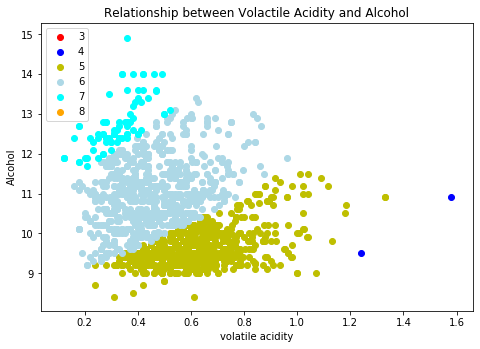

In [93]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
##Solo se graficarán del 3 al 8, dado que nuestro data set solo cuenta con este rango
ax.scatter(X_train[y_hat==3,0], X_train[y_hat==3,1], color='r', label=3)
ax.scatter(X_train[y_hat==4,0], X_train[y_hat==4,1], color='b', label=4)
ax.scatter(X_train[y_hat==5,0], X_train[y_hat==5,1], color='y', label=5)
ax.scatter(X_train[y_hat==6,0], X_train[y_hat==6,1], color='lightblue', label=6)
ax.scatter(X_train[y_hat==7,0], X_train[y_hat==7,1], color='cyan', label=7)
ax.scatter(X_train[y_hat==8,0], X_train[y_hat==8,1], color='orange', label=8)
ax.set_xlabel('volatile acidity')
ax.set_ylabel('Alcohol')
ax.set_title('Relationship between Volactile Acidity and Alcohol')
plt.legend(loc="upper left")
plt.show()